In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'net.zenius.mobile',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi zenius yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=5000, # disini jumlah ulasan yang mau kita ambil ada 5000
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bdc7db03-2b54-403a-a338-a48c08265167,Lyn Lin,https://play-lh.googleusercontent.com/a-/ALV-U...,Suka pake zenius pembahasan mudah di mengerti ...,5,35,2.9.4,2023-09-10 10:41:14,None,NaT,2.9.4
1,a40cb894-f4c4-47e3-b58a-7a8d6814498f,Komang oka Astrawan,https://play-lh.googleusercontent.com/a/ACg8oc...,"Perbaiki lagi, saat aku ingin mencari sesuatu ...",1,7,2.9.4,2023-10-27 13:25:27,"Hai, mohon maaf atas kendala yang dialami. Sil...",2023-10-31 12:02:37,2.9.4
2,40dc92bc-31a5-499e-b87a-45cc9aedd54d,Atika Melinda,https://play-lh.googleusercontent.com/a/ACg8oc...,"Dari segi cara ngajar tutor"" nya sukaak bgt🌟 c...",4,29,2.9.4,2023-09-25 15:03:56,None,NaT,2.9.4
3,868568a0-eac9-4f01-be53-3fe6f3173362,Nadiva Mecca,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kereeen isinya, tapi kenapa app nya gabisa dil...",5,2,2.9.4,2023-10-10 11:16:36,"Hai, mohon maaf atas kendala yang terjadi. Sil...",2023-07-27 01:26:10,2.9.4
4,bd4f9d5b-7697-4b8c-9367-bf0306a18334,Suci Karmila,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya dah bagus tapi kenapa saya ngak bi...,2,0,2.9.4,2023-10-03 14:51:26,"Halo, sebelumnya mohon maaf atas ketidaknyaman...",2023-10-15 02:54:41,2.9.4


In [ ]:
df_busu.shape

(5000, 11)

In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
89,Siti Rohayati,2,2023-11-13 12:39:33,Kenapa pas buka video di hp keluar terus
7,Faza ihcsan Syauqi,4,2023-11-13 07:17:14,"Sedikit saran, kalo bisa video pembahasan Zenc..."
2023,ηαмєlєѕѕ,1,2023-11-12 15:39:08,Saya mendapat notifikasi dari Google one bahwa...
2235,Monika Ito,1,2023-11-08 14:42:01,Data pengguna tidak terlindungi dengan baik se...
2020,Hendra Hendra,1,2023-11-08 13:24:45,Sumpah gw benci banget sama aplikasi nya masa ...


In [ ]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [ ]:
my_df.head()

,content,score
89,Kenapa pas buka video di hp keluar terus,2
7,"Sedikit saran, kalo bisa video pembahasan Zenc...",4
2023,Saya mendapat notifikasi dari Google one bahwa...,1
2235,Data pengguna tidak terlindungi dengan baik se...,1
2020,Sumpah gw benci banget sama aplikasi nya masa ...,1


In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-37-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
89,Kenapa pas buka video di hp keluar terus,2,Negatif
7,"Sedikit saran, kalo bisa video pembahasan Zenc...",4,Positif
2023,Saya mendapat notifikasi dari Google one bahwa...,1,Negatif
2235,Data pengguna tidak terlindungi dengan baik se...,1,Negatif
2020,Sumpah gw benci banget sama aplikasi nya masa ...,1,Negatif
6,"Suka banget sama apk zenius, soalny penjelasan...",5,Positif
1755,Aplikasi nya bagus banget,5,Positif
2024,"Data aku kok terutama nomor hp, bisa sampe boc...",1,Negatif
1,"Perbaiki lagi, saat aku ingin mencari sesuatu ...",1,Negatif
2268,"Aplikasi terpelittttttt!!!!!,Aplikasi tololl g...",1,Negatif


In [ ]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.duplicated().sum()

182

In [ ]:
df = my_df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4818, 3)

In [ ]:
df.to_excel("scrapping_playstore_zenius.xlsx", index = False)  #kemudian save menjadi file xlsx

# Preprocessing

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Load data from Excel file
file_path = 'scrapping_playstore_zenius.xlsx'
my_df = pd.read_excel(file_path)

In [ ]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
my_df.head(50)

Hasil Cleaning: 



,content,score,Label
0,Kenapa pas buka video di hp keluar terus,2,Negatif
1,Sedikit saran kalo bisa video pembahasan Zenco...,4,Positif
2,Saya mendapat notifikasi dari Google one bahwa...,1,Negatif
3,Data pengguna tidak terlindungi dengan baik se...,1,Negatif
4,Sumpah gw benci banget sama aplikasi nya masa ...,1,Negatif
5,Suka banget sama apk zenius soalny penjelasann...,5,Positif
6,Aplikasi nya bagus banget,5,Positif
7,Data aku kok terutama nomor hp bisa sampe boco...,1,Negatif
8,Perbaiki lagi saat aku ingin mencari sesuatu d...,1,Negatif
9,Aplikasi terpelitttttttAplikasi tololl giliran...,1,Negatif


In [ ]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
my_df.head(50)

Hasil Case Folding: 



,content,score,Label
0,kenapa pas buka video di hp keluar terus,2,Negatif
1,sedikit saran kalo bisa video pembahasan zenco...,4,Positif
2,saya mendapat notifikasi dari google one bahwa...,1,Negatif
3,data pengguna tidak terlindungi dengan baik se...,1,Negatif
4,sumpah gw benci banget sama aplikasi nya masa ...,1,Negatif
5,suka banget sama apk zenius soalny penjelasann...,5,Positif
6,aplikasi nya bagus banget,5,Positif
7,data aku kok terutama nomor hp bisa sampe boco...,1,Negatif
8,perbaiki lagi saat aku ingin mencari sesuatu d...,1,Negatif
9,aplikasi terpelitttttttaplikasi tololl giliran...,1,Negatif


In [ ]:
my_df.to_excel('zenius_cleaning.xlsx', index=False)

In [ ]:
data_fold = pd.read_excel('zenius_cleaning.xlsx')
print(data_fold.shape)
data_fold.head()

(4818, 3)


,content,score,Label
0,kenapa pas buka video di hp keluar terus,2,Negatif
1,sedikit saran kalo bisa video pembahasan zenco...,4,Positif
2,saya mendapat notifikasi dari google one bahwa...,1,Negatif
3,data pengguna tidak terlindungi dengan baik se...,1,Negatif
4,sumpah gw benci banget sama aplikasi nya masa ...,1,Negatif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0   [kenapa, pas, buka, video, di, hp, keluar, terus]      2  Negatif
1   [sedikit, saran, kalo, bisa, video, pembahasan...      4  Positif
2   [saya, mendapat, notifikasi, dari, google, one...      1  Negatif
3   [data, pengguna, tidak, terlindungi, dengan, b...      1  Negatif
4   [sumpah, gw, benci, banget, sama, aplikasi, ny...      1  Negatif
5   [suka, banget, sama, apk, zenius, soalny, penj...      5  Positif
6                      [aplikasi, nya, bagus, banget]      5  Positif
7   [data, aku, kok, terutama, nomor, hp, bisa, sa...      1  Negatif
8   [perbaiki, lagi, saat, aku, ingin, mencari, se...      1  Negatif
9   [aplikasi, terpelitttttttaplikasi, tololl, gil...      1  Negatif
10  [kenapa, soal, numerasi, kls, sd, bnyak, yg, g...      5  Positif
11                [ga, bertele, tele, the, best, dah]      5  Positif
12  [terbantu, memang, tapi, kadang, sukakk, lama,...      4  Positif


In [ ]:
my_df.to_excel('zenius_tokenizing.xlsx', index=False)

In [ ]:
data_token = pd.read_excel("zenius_tokenizing.xlsx")
print(data_token.shape)
data_token.head()

(4818, 3)


,content,score,Label
0,"['kenapa', 'pas', 'buka', 'video', 'di', 'hp',...",2,Negatif
1,"['sedikit', 'saran', 'kalo', 'bisa', 'video', ...",4,Positif
2,"['saya', 'mendapat', 'notifikasi', 'dari', 'go...",1,Negatif
3,"['data', 'pengguna', 'tidak', 'terlindungi', '...",1,Negatif
4,"['sumpah', 'gw', 'benci', 'banget', 'sama', 'a...",1,Negatif


In [ ]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0                                   [buka, video, hp]      2  Negatif
1   [saran, video, pembahasan, zencore, play, kece...      4  Positif
2   [notifikasi, one, akun, email, zenius, nomer, ...      1  Negatif
3   [data, pengguna, terlindungi, tersebar, dark, ...      1  Negatif
4   [sumpah, benci, aplikasi, kotakabupaten, gk, s...      1  Negatif
5   [suka, apk, zenius, soalny, penjelasannya, mud...      5  Positif
6                                   [aplikasi, bagus]      5  Positif
7   [data, nomor, hp, sampe, bocor, didark, web, g...      1  Negatif
8   [perbaiki, mencari, aplikasi, nyambung, hasil,...      1  Negatif
9   [aplikasi, terpelitttttttaplikasi, tololl, gil...      1  Negatif
10         [numerasi, kls, sd, bnyak, buka, klik, tp]      5  Positif
11                         [bertele, tele, the, best]      5  Positif
12  [terbantu, kadang, sukakk, bukanya, sampe, bol...      4  Positif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_df.to_excel('zenius_stopword.xlsx', index=False)

In [ ]:
data_filter = pd.read_excel("zenius_stopword.xlsx")
print(data_filter.shape)
data_filter.head()

(4818, 3)


,content,score,Label
0,"['buka', 'video', 'hp']",2,Negatif
1,"['saran', 'video', 'pembahasan', 'zencore', 'p...",4,Positif
2,"['notifikasi', 'one', 'akun', 'email', 'zenius...",1,Negatif
3,"['data', 'pengguna', 'terlindungi', 'tersebar'...",1,Negatif
4,"['sumpah', 'benci', 'aplikasi', 'kotakabupaten...",1,Negatif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
my_df['content'].head()

0                                    [buka, video, hp]
1    [saran, video, bahas, zencore, play, cepat, ba...
2    [notifikasi, one, akun, email, zenius, nomer, ...
3              [data, guna, lindung, sebar, dark, web]
4    [sumpah, benci, aplikasi, kotakabupaten, gk, s...
Name: content, dtype: object

In [ ]:
my_df.to_excel('zenius_final.xlsx', index=False)

In [ ]:
datafinal = pd.read_excel("zenius_final.xlsx")
print(datafinal.shape)
print(datafinal.head())

(4818, 3)
                                             content  score    Label
0                            ['buka', 'video', 'hp']      2  Negatif
1  ['saran', 'video', 'bahas', 'zencore', 'play',...      4  Positif
2  ['notifikasi', 'one', 'akun', 'email', 'zenius...      1  Negatif
3  ['data', 'guna', 'lindung', 'sebar', 'dark', '...      1  Negatif
4  ['sumpah', 'benci', 'aplikasi', 'kotakabupaten...      1  Negatif


## TF-IDF

In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("zenius_final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

      aaa  aaaaa  aaaaaaa  aaaaaaaaa  aacchhh  aaj  aal  aamiin  aamiinn  \
0     0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
1     0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
2     0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
3     0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
4     0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
...   ...    ...      ...        ...      ...  ...  ...     ...      ...   
4813  0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
4814  0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
4815  0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
4816  0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   
4817  0.0    0.0      0.0        0.0      0.0  0.0  0.0     0.0      0.0   

      aamiinnn  ...  zenxplore  zerius  zetbot  zeus  zno  zns  zona  zoom  \
0        

# Modelling

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("zenius_final.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.7987551867219918
Presisi (80:20): 0.7493173435600822
Recall (80:20): 0.7987551867219918
F1 Score (80:20): 0.7607432292782628

Random Forest:
Akurasi (80:20): 0.7894190871369294
Presisi (80:20): 0.6985114786227741
Recall (80:20): 0.7894190871369294
F1 Score (80:20): 0.7356202276434333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualisasi

## WordCloud

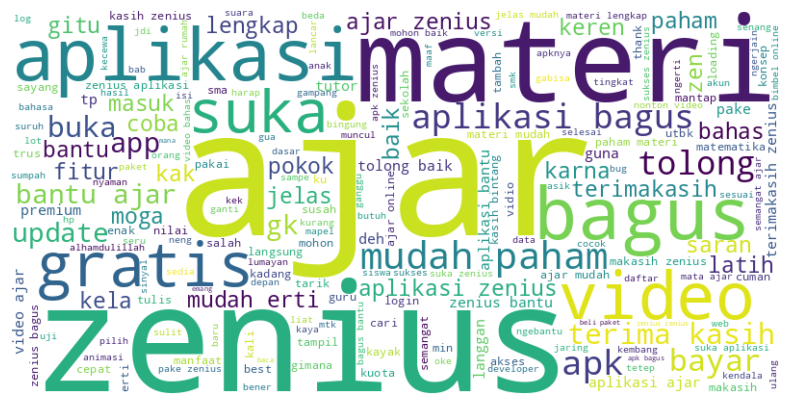

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(' '.join(map(str, content)) for content in my_df['content'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Tampilkan word cloud dengan matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Lihat Persebaran Sentiment

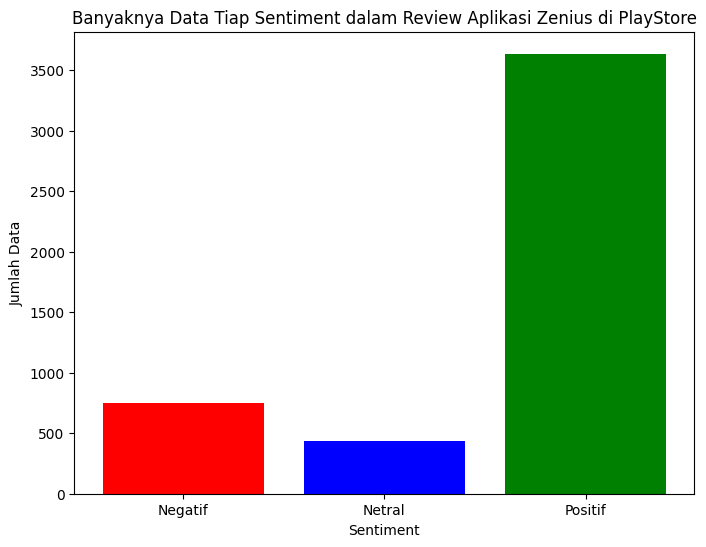

{'Negatif': 748, 'Netral': 435, 'Positif': 3635}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
colors = {'Negatif': 'red', 'Netral': 'blue', 'Positif': 'green'}
plt.bar(unique_targets, target_counts, color=[colors[Label]for Label in unique_targets])
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Sentiment dalam Review Aplikasi Zenius di PlayStore')
plt.show()

unique_targets, target_counts = np.unique(y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))